##  Multiple Linear Regression

### Data Preprocessing Steps

In [1]:
# Importing all the libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading the csv file

df = pd.read_csv("data _Full.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# To check the missing values

df[df.isnull()].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

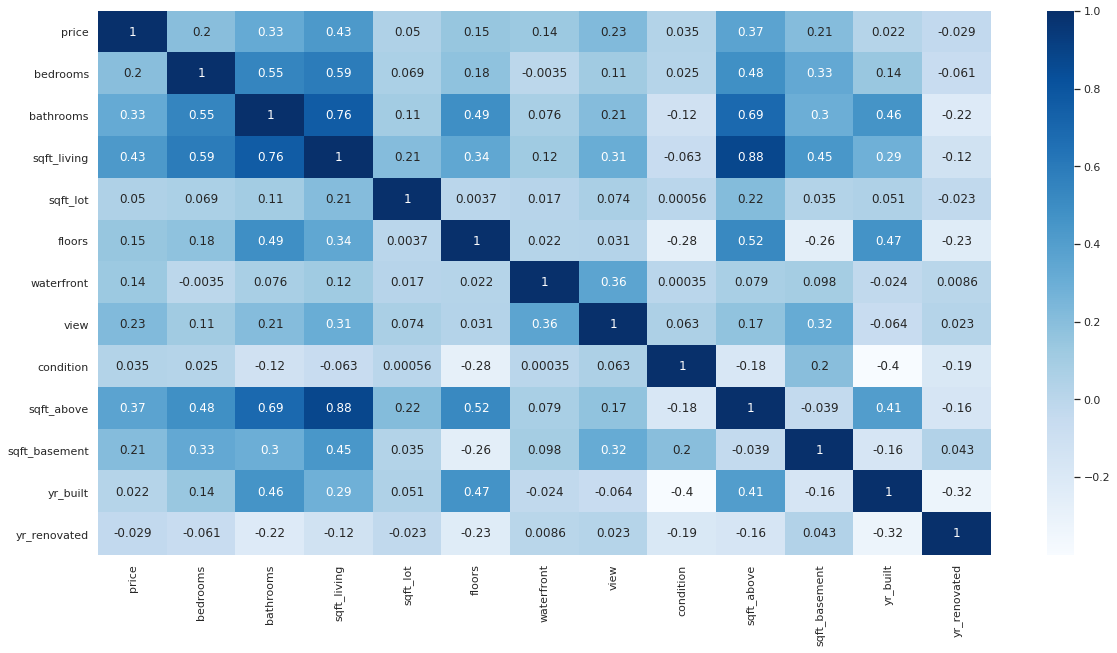

In [5]:
#checking all the columns through boxPlot

sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [6]:
# sqft_living is higly correlated to sqft_above, and sqft_living and bathrooms as well, therefore we are dropping sqft_living

df.drop(['sqft_living'],axis = 1,inplace=True)

In [7]:
# Checking how many counts of each type of country we have in our dataset

df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [8]:
# Dropping country column as we have unique value i.e., USA

df.drop('country',axis = 1,inplace=True)

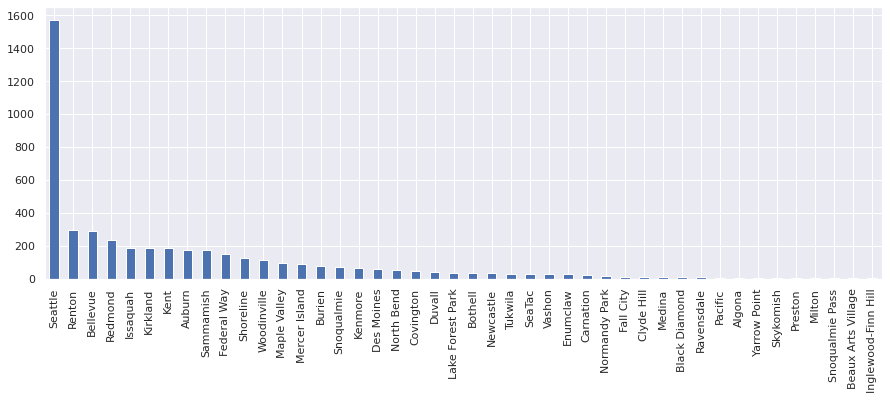

In [9]:
# Checking city column

plt.figure(figsize=(15,5))
df.city.value_counts().plot.bar()
plt.show()

In [10]:
# As we can see we have seattle country as most, so we keeping only that data

df = df[df['city'] == 'Seattle']

In [11]:
# As we can see almost all values are unique or doubled

df.street.value_counts().head(20)

611 N 46th St              2
9507 Ashworth Ave N        2
820 NW 95th St             2
2050 14th Ave W            2
8216 Linden Ave N          2
2803 SW Bataan St          2
353 N 105th St             2
3510 S Holly St            2
9413 34th Ave SW           2
12303 Sand Point Way NE    2
8354 11th Ave NW           2
513 N 46th St              2
8430 8th Ave SW            2
2300 14th Ave S            2
769 N 74th St              2
4507 Linden Ave N          2
6008 8th Ave NE            2
2008 Yale Ave E            2
1018 NE 96th St            2
11716 16th Ave NE          2
Name: street, dtype: int64

In [12]:
#Counting the waterfront column

df.waterfront.value_counts()

0    1569
1       4
Name: waterfront, dtype: int64

In [13]:
# Dropping certain fields

df.drop(['city','street','date','waterfront'],axis = 1,inplace=True)

In [14]:
# To scale statezip column 

le = LabelEncoder()
df['statezip'] = le.fit_transform(df['statezip'])

In [15]:
# To scale statezip column 

le = LabelEncoder()
df['statezip'] = le.fit_transform(df['statezip'])

In [16]:
import statsmodels.api as sm

X = df.drop('price',axis = 1) #predictor
y = df['price'] #response
X = sm.add_constant(X) # Adds a constant term to the predictor
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     75.79
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.58e-136
Time:                        20:05:51   Log-Likelihood:                -22415.
No. Observations:                1573   AIC:                         4.485e+04
Df Residuals:                    1561   BIC:                         4.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.748e+06   7.63e+05      3.602      0.000    1.25e+06    4.24e+06
bedrooms      -6.234e+04   1.28e+04     -4.863      0.000   -8.75e+04   -3.72e+04
bathrooms      4.827e+04   2.02e+04      2.395      0.017    8739.351    8.78e+04
sqft_lot         -1.6417      2.844     -0.577      0.564      -7.220       3.937
floors         6750.3238   2.49e+04      0.271      0.786   -4.21e+04    5.56e+04
view           5.006e+04   1.28e+04      3.910      0.000    2.49e+04    7.52e+04
condition      2.769e+04   1.55e+04      1.791      0.074   -2642.074     5.8e+04
sqft_above      369.7473     25.565     14.463      0.000     319.601     419.894
sqft_basement   183.6953     30.128      6.097      0.000     124.600     242.790
yr_built      -1405.4731    382.546     -3.674      0.000   -2155.831    -655.116
yr_renovated      5.5857     11.146      0.501      0.616     -16.278      27.449
statezip      -4083.7550   1505.035     -2.713      0.007   -7035.859   -1131.651
==============================================================================
Omnibus:                     3731.450   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36442008.248
Skew:                          22.724   Prob(JB):                         0.00
Kurtosis:                     747.276   Cond. No.                     5.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fitting our MLR model to the Training set -

In [17]:
# Here, we are disturbing our data as X and Y i.e.,(Training and Testing Data)

X = df.drop(['price','sqft_lot','floors','yr_renovated'],axis = 1)
Y = df[['price']]

In [18]:
X

,bedrooms,bathrooms,view,condition,sqft_above,sqft_basement,yr_built,statezip
1,5.0,2.50,4,5,3370,280,1921,12
5,2.0,1.00,0,3,880,0,1938,8
9,4.0,2.00,0,3,1520,0,1945,8
11,4.0,2.50,0,5,1910,1010,1909,2
13,3.0,1.00,0,4,1090,0,1955,3
...,...,...,...,...,...,...,...,...
4582,2.0,1.00,0,4,1290,0,1906,8
4585,3.0,1.00,0,4,1390,500,1901,1
4591,3.0,1.75,0,4,940,940,1945,15
4595,3.0,1.75,0,4,1510,0,1954,16


In [19]:
Y

,price
1,2.384000e+06
5,4.900000e+05
9,6.400000e+05
11,1.400000e+06
13,3.650000e+05
...,...
4582,4.060625e+05
4585,4.868950e+05
4591,3.961667e+05
4595,3.081667e+05


In [20]:
#Implementing Liner Regression Model

model = LinearRegression()

In [21]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [22]:
# Fitting the model

model.fit(X_train, y_train)

LinearRegression()

### Prediction of Test set results -

In [23]:
#Prediciting the values

y_pred = model.predict(X_test)  
x_pred = model.predict(X_train) 

In [24]:
#Checking the score

#print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  

Train Score:  0.3070740226255029
Test Score:  0.7321709993579761
